In [87]:
#Importing Libraries and Dataset

import numpy as np
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels 






df = pd.read_csv('C:/Users/advai/Desktop/Python/archive/House Price India.csv',index_col=0,header=0)
print(df)

,Date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,...,Built_Year,Renovation_Year,Postal_Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number_of_schools_nearby,Distance_from_the_airport,Price
id,,,,,,,,,,,,,,,,,,,,,
6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14620 entries, 6762810145 to 6762831463
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  14620 non-null  int64  
 1   number_of_bedrooms                    14620 non-null  int64  
 2   number_of_bathrooms                   14620 non-null  float64
 3   living_area                           14620 non-null  int64  
 4   lot_area                              14620 non-null  int64  
 5   number_of_floors                      14620 non-null  float64
 6   waterfront_present                    14620 non-null  int64  
 7   number_of_views                       14620 non-null  int64  
 8   condition_of_the_house                14620 non-null  int64  
 9   grade_of_the_house                    14620 non-null  int64  
 10  Area_of_the_house_excluding_basement  14620 non-null  int64  
 11  A

In [89]:
df.describe()

,Date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,...,Built_Year,Renovation_Year,Postal_Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number_of_schools_nearby,Distance_from_the_airport,Price
count,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


<AxesSubplot:>

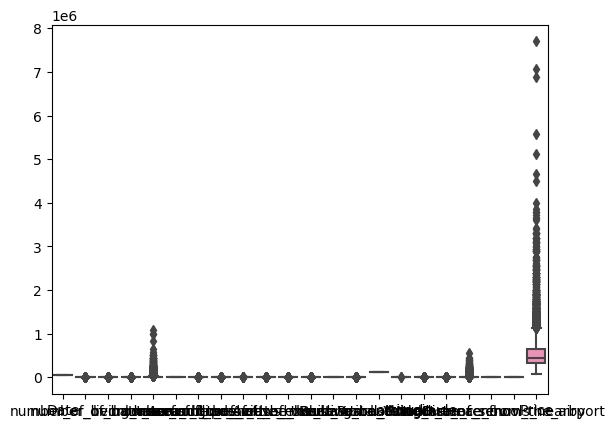

In [90]:
#

sns.boxplot(data=df)

In [91]:
#Normal Correlation Matrix

df.corr()

,Date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,...,Built_Year,Renovation_Year,Postal_Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number_of_schools_nearby,Distance_from_the_airport,Price
Date,1.000000,-0.015663,-0.026485,-0.021958,0.004392,-0.010335,0.012006,-0.004782,-0.027402,-0.033097,...,-0.005869,-0.011636,0.018243,-0.023327,-0.018231,-0.032495,-0.000050,-0.004071,0.011457,-0.027919
number_of_bedrooms,-0.015663,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,0.352945,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number_of_bathrooms,-0.026485,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,0.663054,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living_area,-0.021958,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,0.761835,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot_area,0.004392,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,0.110546,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number_of_floors,-0.010335,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,0.463082,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront_present,0.012006,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,0.079831,...,-0.024226,0.085865,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number_of_views,-0.004782,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,0.254532,...,-0.055357,0.102944,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition_of_the_house,-0.027402,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,-0.152530,...,-0.381718,-0.062126,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376
grade_of_the_house,-0.033097,0.352945,0.663054,0.761835,0.110546,0.463082,0.079831,0.254532,-0.152530,1.000000,...,0.440358,0.014501,-0.146342,0.115256,0.203754,0.720019,0.116725,0.000986,0.004940,0.671814


<AxesSubplot:>

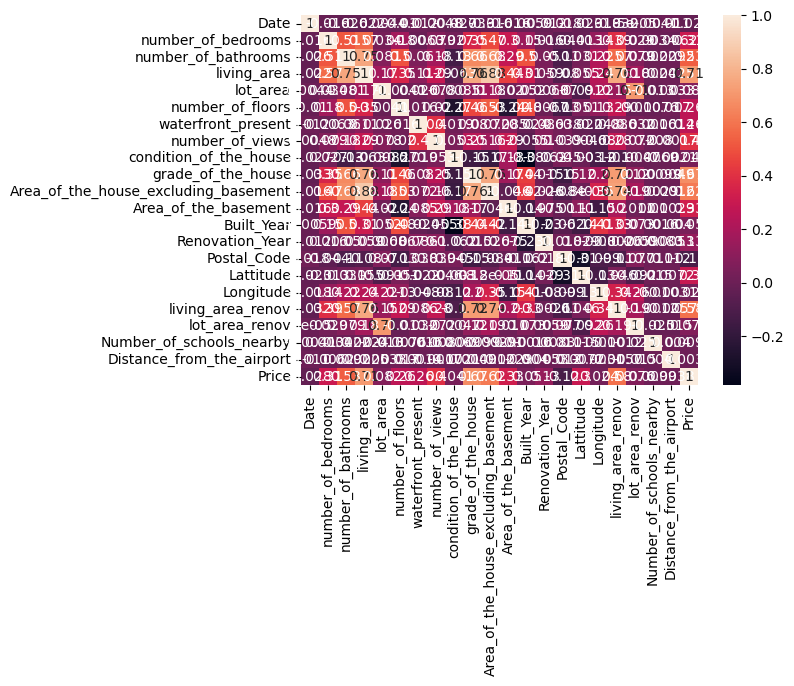

In [92]:
#Correlation matrix (Heat Map)

%matplotlib inline
sns.heatmap(df.corr(),annot = True)

<Figure size 10000x10000 with 0 Axes>

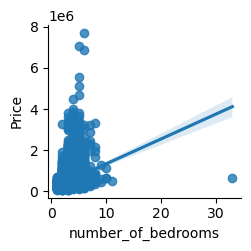

<Figure size 10000x10000 with 0 Axes>

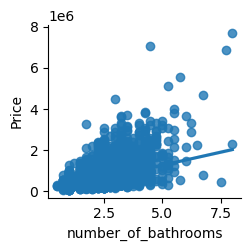

<Figure size 10000x10000 with 0 Axes>

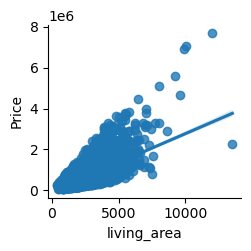

<Figure size 10000x10000 with 0 Axes>

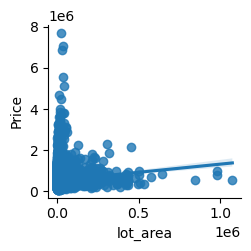

<Figure size 10000x10000 with 0 Axes>

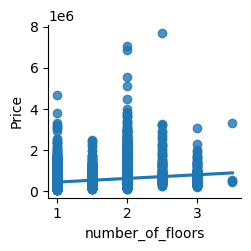

<Figure size 10000x10000 with 0 Axes>

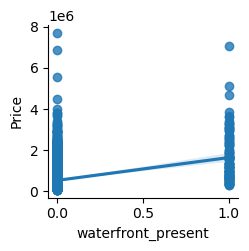

<Figure size 10000x10000 with 0 Axes>

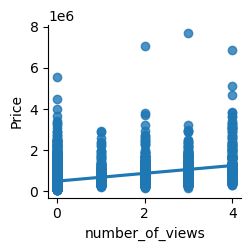

<Figure size 10000x10000 with 0 Axes>

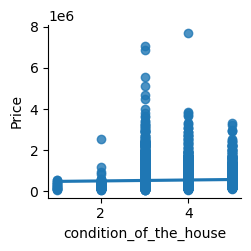

<Figure size 10000x10000 with 0 Axes>

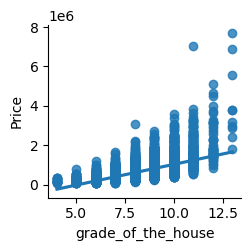

<Figure size 10000x10000 with 0 Axes>

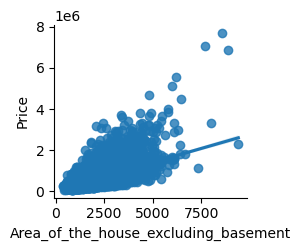

<Figure size 10000x10000 with 0 Axes>

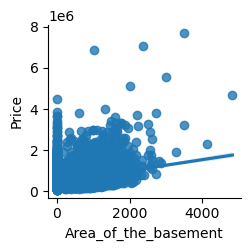

<Figure size 10000x10000 with 0 Axes>

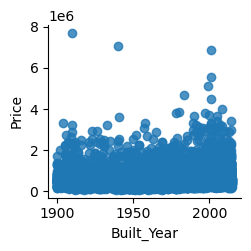

<Figure size 10000x10000 with 0 Axes>

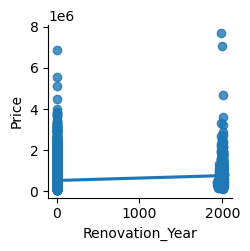

<Figure size 10000x10000 with 0 Axes>

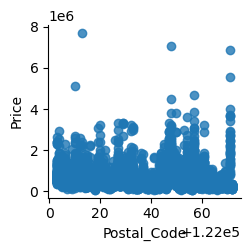

<Figure size 10000x10000 with 0 Axes>

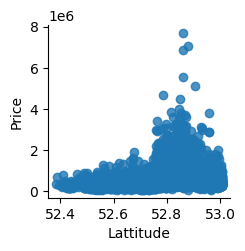

<Figure size 10000x10000 with 0 Axes>

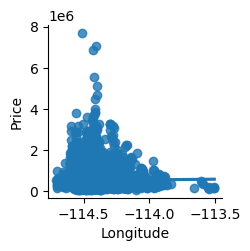

<Figure size 10000x10000 with 0 Axes>

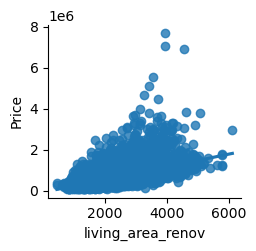

<Figure size 10000x10000 with 0 Axes>

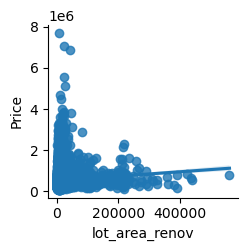

<Figure size 10000x10000 with 0 Axes>

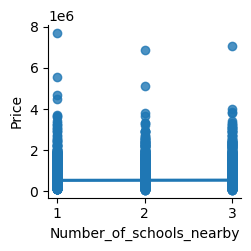

<Figure size 10000x10000 with 0 Axes>

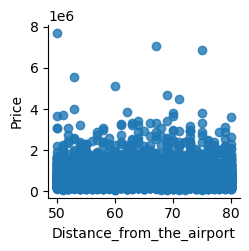

In [93]:
#Pairplot

columns=["number_of_bedrooms" ,"number_of_bathrooms","living_area","lot_area","number_of_floors","waterfront_present","number_of_views","condition_of_the_house","grade_of_the_house","Area_of_the_house_excluding_basement","Area_of_the_basement","Built_Year","Renovation_Year","Postal_Code","Lattitude","Longitude","living_area_renov","lot_area_renov","Number_of_schools_nearby","Distance_from_the_airport"]

for i in range(len(columns)):
    plt.figure(figsize=(100,100))
    sns.pairplot(df,x_vars=[columns[i]],y_vars = "Price", kind='reg')
    plt.show()

In [94]:
X=df[['number_of_bedrooms' ,'number_of_bathrooms','living_area','lot_area','number_of_floors','living_area','number_of_floors','waterfront_present','number_of_views','condition_of_the_house','grade_of_the_house','Area_of_the_house_excluding_basement','Area_of_the_basement','Built_Year','Renovation_Year','Postal_Code','Lattitude','Longitude','living_area_renov','lot_area_renov','Number_of_schools_nearby','Distance_from_the_airport']]
Y=df['Price']

In [95]:
#VIF

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,number_of_bedrooms,22.67
1,number_of_bathrooms,28.85
2,living_area,inf
3,lot_area,2.35
4,number_of_floors,inf
5,living_area,inf
6,number_of_floors,inf
7,waterfront_present,1.21
8,number_of_views,1.57
9,condition_of_the_house,34.92


array([[<AxesSubplot:title={'center':'number_of_bedrooms'}>,
        <AxesSubplot:title={'center':'number_of_bathrooms'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'lot_area'}>,
        <AxesSubplot:title={'center':'number_of_floors'}>],
       [<AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'number_of_floors'}>,
        <AxesSubplot:title={'center':'waterfront_present'}>,
        <AxesSubplot:title={'center':'number_of_views'}>,
        <AxesSubplot:title={'center':'condition_of_the_house'}>],
       [<AxesSubplot:title={'center':'grade_of_the_house'}>,
        <AxesSubplot:title={'center':'Area_of_the_house_excluding_basement'}>,
        <AxesSubplot:title={'center':'Area_of_the_basement'}>,
        <AxesSubplot:title={'center':'Built_Year'}>,
        <AxesSubplot:title={'center':'Renovation_Year'}>],
       [<AxesSubplot:title={'center':'Postal_Code'}>,
        <AxesSubplot:title={'center':'Lattitu

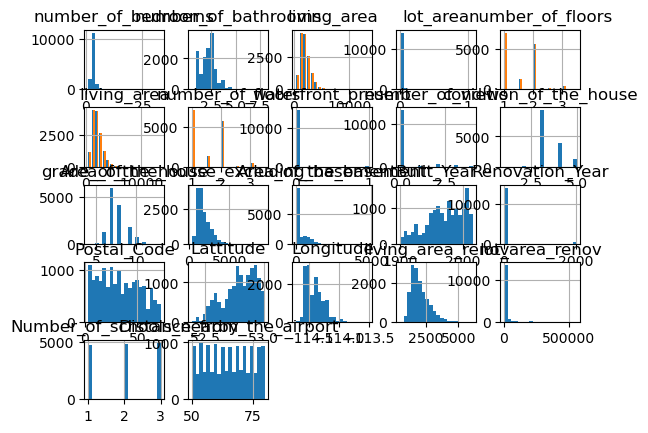

In [96]:
X.hist(bins=20)

In [97]:
#Skewness

data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

number_of_bedrooms                       2.662984
number_of_bathrooms                      0.556606
living_area                              1.538179
lot_area                                10.154164
number_of_floors                         0.586097
living_area                              1.538179
number_of_floors                         0.586097
waterfront_present                      11.293513
number_of_views                          3.408870
condition_of_the_house                   1.017913
grade_of_the_house                       0.777504
Area_of_the_house_excluding_basement     1.436298
Area_of_the_basement                     1.609579
Built_Year                              -0.472000
Renovation_Year                          4.359317
Postal_Code                              0.227712
Lattitude                               -0.523777
Longitude                                0.873713
living_area_renov                        1.081848
lot_area_renov                           7.773409


In [98]:
#Treating Outlier With for Loop

columns=['number_of_bedrooms' ,'number_of_bathrooms','living_area','lot_area','number_of_floors','living_area','number_of_floors','waterfront_present','number_of_views','condition_of_the_house','grade_of_the_house','Area_of_the_house_excluding_basement','Area_of_the_basement','Built_Year','Renovation_Year','Postal_Code','Lattitude','Longitude','living_area_renov','lot_area_renov','Number_of_schools_nearby','Distance_from_the_airport','Price']

for i in range(len(columns)):
    print(columns[i])
    q1 = df[columns[i]].quantile(0.25)
    q3 = df[columns[i]].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    q1,q3,iqr,low,high
    df[columns[i]]=np.where(df[columns[i]] > high,high,df[columns[i]])
    

number_of_bedrooms
number_of_bathrooms
living_area
lot_area
number_of_floors
living_area
number_of_floors
waterfront_present
number_of_views
condition_of_the_house
grade_of_the_house
Area_of_the_house_excluding_basement
Area_of_the_basement
Built_Year
Renovation_Year
Postal_Code
Lattitude
Longitude
living_area_renov
lot_area_renov
Number_of_schools_nearby
Distance_from_the_airport
Price


For column : number_of_bedrooms


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


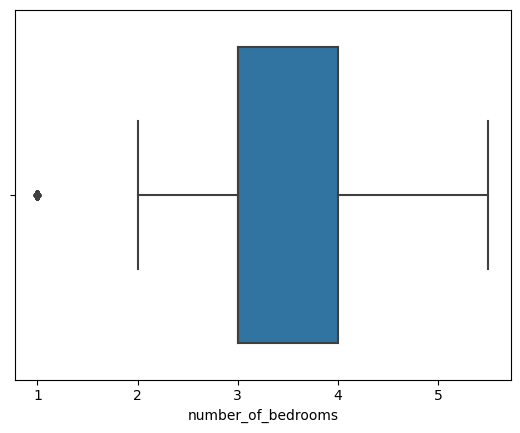

For column : number_of_bathrooms


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


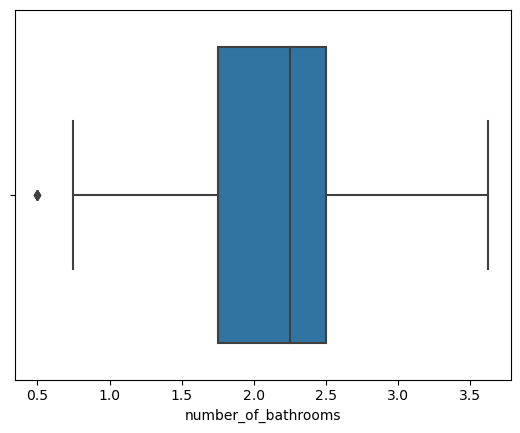

For column : living_area


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


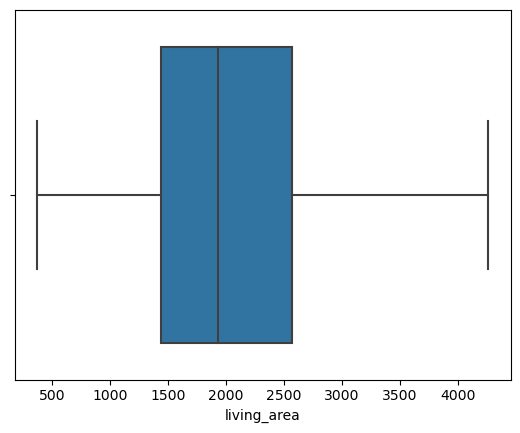

For column : lot_area


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


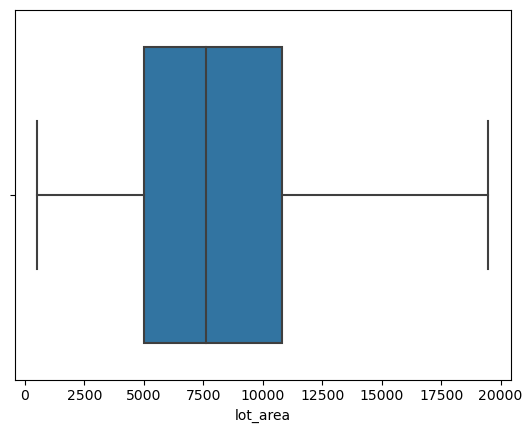

For column : number_of_floors


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


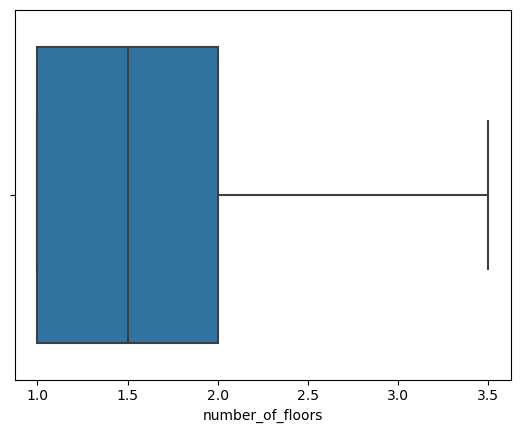

For column : living_area


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


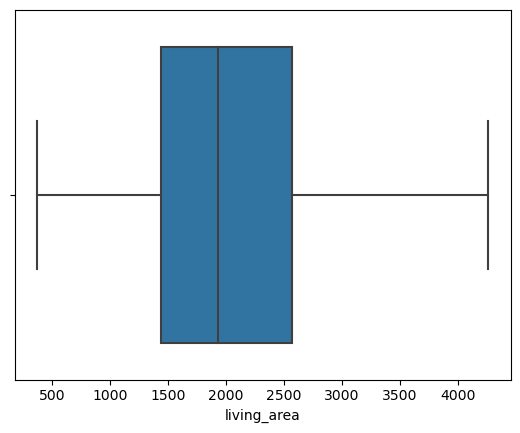

For column : number_of_floors


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


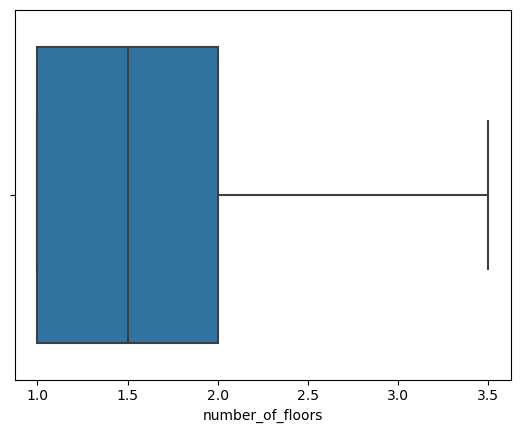

For column : waterfront_present


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


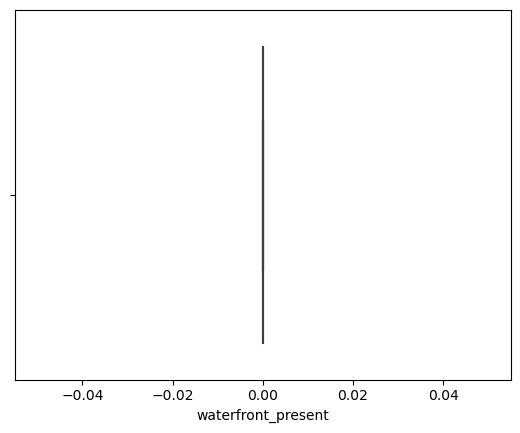

For column : number_of_views


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


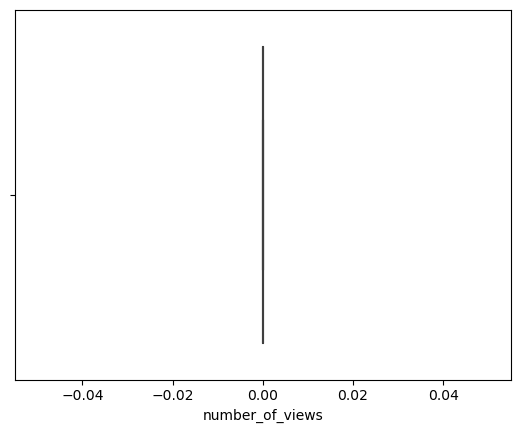

For column : condition_of_the_house


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


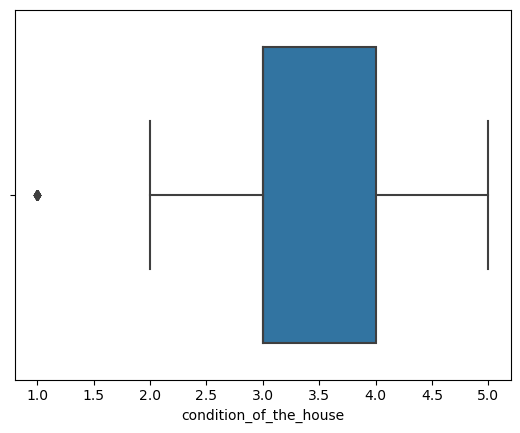

For column : grade_of_the_house


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


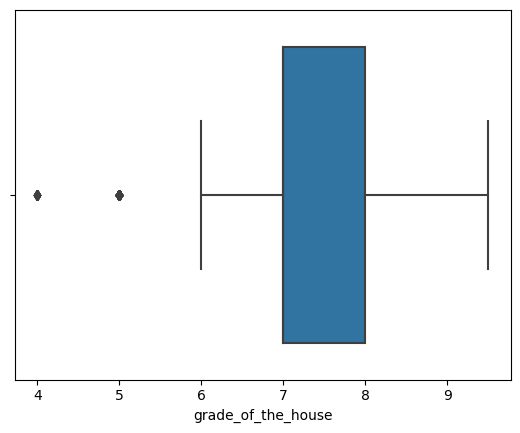

For column : Area_of_the_house_excluding_basement


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


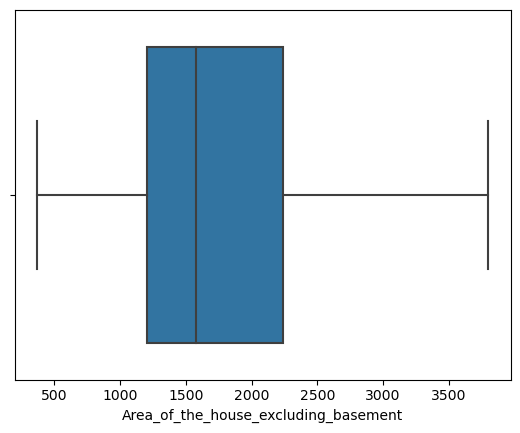

For column : Area_of_the_basement


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


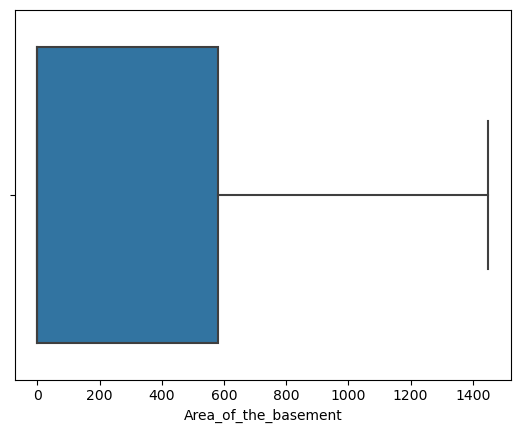

For column : Built_Year


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


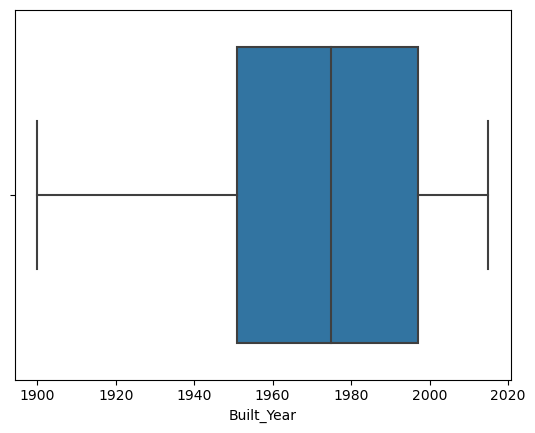

For column : Renovation_Year


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


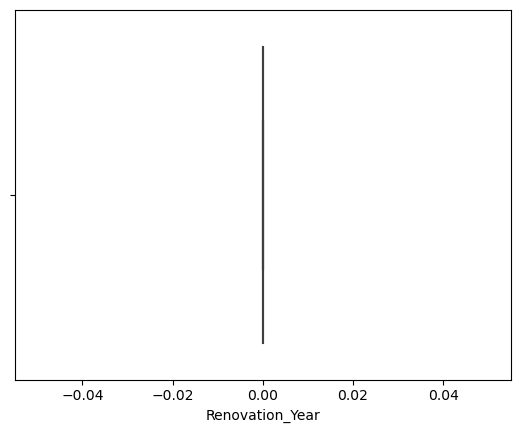

For column : Postal_Code


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


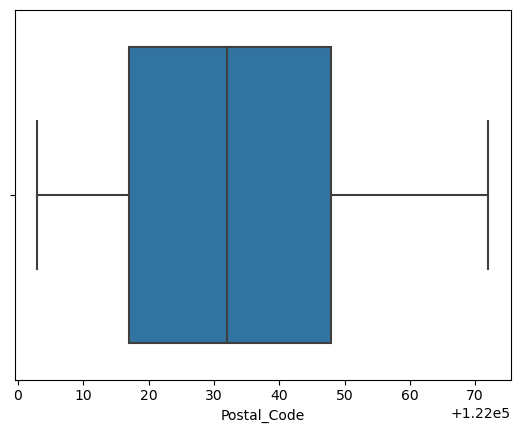

For column : Lattitude


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


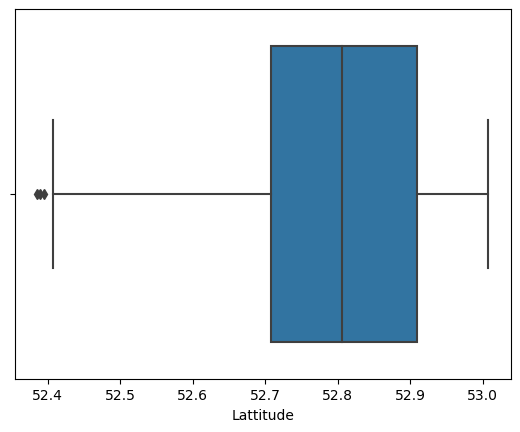

For column : Longitude


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


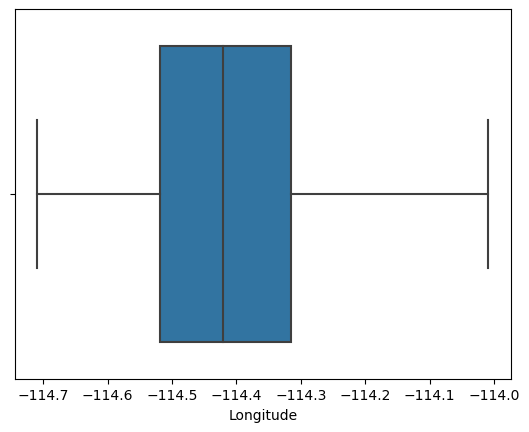

For column : living_area_renov


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


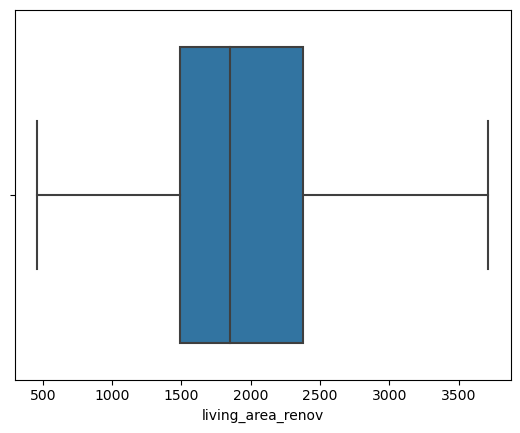

For column : lot_area_renov


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


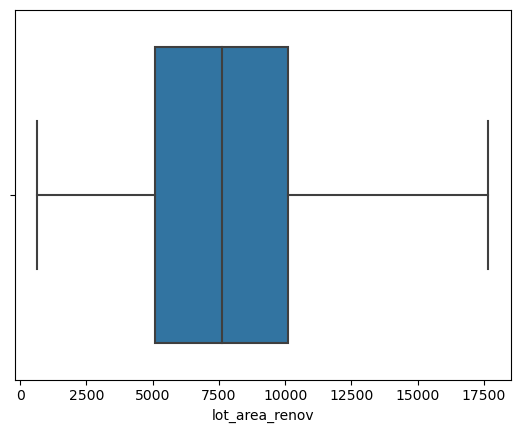

For column : Number_of_schools_nearby


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


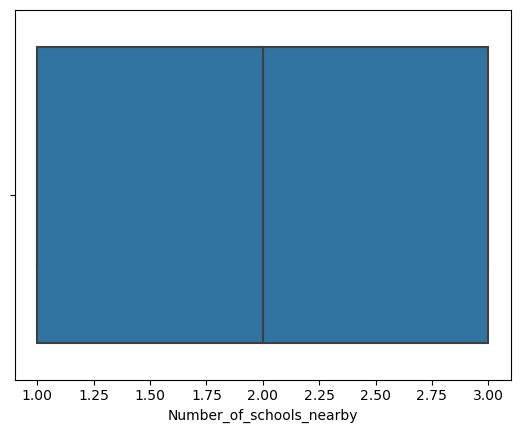

For column : Distance_from_the_airport


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


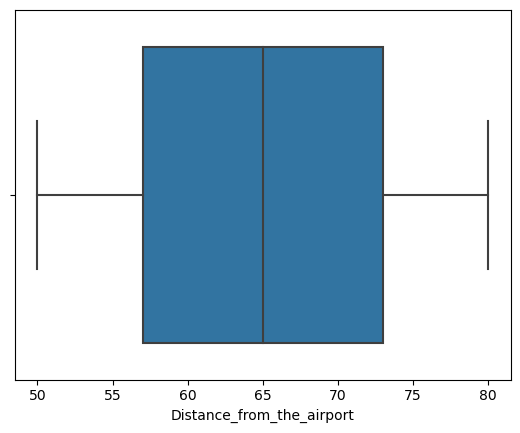

For column : Price


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


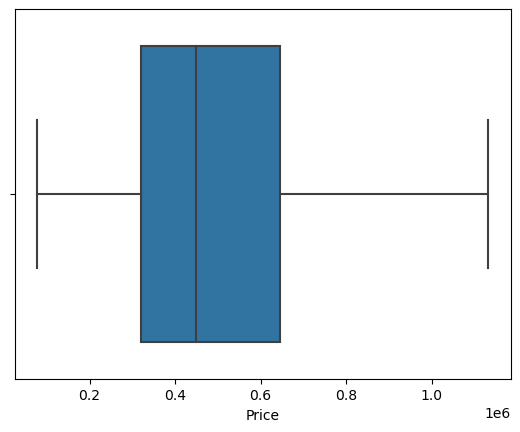

In [99]:
#Individual Boxplots after Outliers treatment

columns=['number_of_bedrooms' ,'number_of_bathrooms','living_area','lot_area','number_of_floors','living_area','number_of_floors','waterfront_present','number_of_views','condition_of_the_house','grade_of_the_house','Area_of_the_house_excluding_basement','Area_of_the_basement','Built_Year','Renovation_Year','Postal_Code','Lattitude','Longitude','living_area_renov','lot_area_renov','Number_of_schools_nearby','Distance_from_the_airport','Price']


for i in range(len(columns)):
    print("For column : {}".format(columns[i]))
    sns.boxplot(df[columns[i]])
    plt.show()

In [100]:
X = df.drop('Price', axis= 1)

# Putting response variable to y
y = df['Price']

In [101]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

df = pd.concat([y_train, X_train], axis=1)
df.columns

Index(['Price', 'Date', 'number_of_bedrooms', 'number_of_bathrooms',
       'living_area', 'lot_area', 'number_of_floors', 'waterfront_present',
       'number_of_views', 'condition_of_the_house', 'grade_of_the_house',
       'Area_of_the_house_excluding_basement', 'Area_of_the_basement',
       'Built_Year', 'Renovation_Year', 'Postal_Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number_of_schools_nearby', 'Distance_from_the_airport'],
      dtype='object')

In [102]:
#Train Model Building

model=smf.ols('Price~ + number_of_bedrooms + number_of_bathrooms + living_area + lot_area + number_of_floors + waterfront_present + number_of_views + condition_of_the_house + grade_of_the_house + Area_of_the_house_excluding_basement + Area_of_the_basement+ Built_Year + Renovation_Year + Postal_Code + Lattitude + Longitude +living_area_renov + lot_area_renov + Number_of_schools_nearby + Distance_from_the_airport',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1738.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -1.3481e+05
No. Observations:               10234   AIC:                         2.696e+05
Df Residuals:                   10216   BIC:                         2.698e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             1.542e+07   8.78e+06      1.756      0.079    -1.8e+06    3.26e+07
number_of_bedrooms                   -2.323e+04   1906.467    -12.187      0.000    -2.7e+04   -1.95e+04
number_of_bathrooms                   2.618e+04   3171.934      8.254      0.000       2e+04    3.24e+04
living_area                            123.5350     13.137      9.403      0.000      97.783     149.287
lot_area                                -0.2735      0.563     -0.486      0.627      -1.378       0.831
number_of_floors                      1.502e+04   3541.152      4.242      0.000    8079.242     2.2e+04
waterfront_present                    -7.71e-05   4.39e-05     -1.756      0.079      -0.000    8.98e-06
number_of_views                      -3.511e-05      2e-05     -1.756      0.079   -7.43e-05    4.09e-06
condition_of_the_house                2.775e+04   2117.972     13.103      0.000    2.36e+04    3.19e+04
grade_of_the_house                    8.677e+04   2176.967     39.858      0.000    8.25e+04     9.1e+04
Area_of_the_house_excluding_basement    -8.0756     13.273     -0.608      0.543     -34.092      17.941
Area_of_the_basement                   -14.9712     12.894     -1.161      0.246     -40.246      10.304
Built_Year                           -2092.9400     63.117    -33.160      0.000   -2216.662   -1969.218
Renovation_Year                      -6.973e-07   3.97e-07     -1.755      0.079   -1.48e-06    8.13e-08
Postal_Code                           -372.9493     71.382     -5.225      0.000    -512.872    -233.027
Lattitude                             4.837e+05   1.01e+04     48.061      0.000    4.64e+05    5.03e+05
Longitude                            -7.071e+04   1.15e+04     -6.137      0.000   -9.33e+04   -4.81e+04
living_area_renov                       66.5914      3.379     19.710      0.000      59.969      73.214
lot_area_renov                          -1.4940      0.670     -2.230      0.026      -2.807      -0.181
Number_of_schools_nearby               449.2834   1539.608      0.292      0.770   -2568.650    3467.217
Distance_from_the_airport             -108.2801    140.954     -0.768      0.442    -384.577     168.017
==============================================================================
Omnibus:                      749.029   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1226.179
Skew:                           0.565   Prob(JB):                    5.48e-267
Kurtosis:                       4.264   Cond. No.                     5.68e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [103]:
# Removing The most insignificant variables (starting with Lot_area)

model=smf.ols('Price~ + number_of_bedrooms + number_of_bathrooms + living_area + number_of_floors + waterfront_present + number_of_views + condition_of_the_house + grade_of_the_house + Area_of_the_house_excluding_basement + Area_of_the_basement+ Built_Year + Renovation_Year + Postal_Code + Lattitude + Longitude +living_area_renov + lot_area_renov + Number_of_schools_nearby + Distance_from_the_airport',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1847.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -1.3481e+05
No. Observations:               10234   AIC:                         2.696e+05
Df Residuals:                   10217   BIC:                         2.698e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             1.541e+07   8.78e+06      1.755      0.079    -1.8e+06    3.26e+07
number_of_bedrooms                   -2.322e+04   1906.258    -12.182      0.000    -2.7e+04   -1.95e+04
number_of_bathrooms                    2.62e+04   3171.664      8.260      0.000       2e+04    3.24e+04
living_area                            123.4293     13.135      9.397      0.000      97.682     149.176
number_of_floors                       1.51e+04   3536.861      4.270      0.000    8170.963     2.2e+04
waterfront_present                      -0.0002      0.000     -1.755      0.079      -0.000     2.2e-05
number_of_views                       6.483e-06   3.69e-06      1.755      0.079   -7.58e-07    1.37e-05
condition_of_the_house                2.778e+04   2117.239     13.120      0.000    2.36e+04    3.19e+04
grade_of_the_house                    8.678e+04   2176.803     39.865      0.000    8.25e+04     9.1e+04
Area_of_the_house_excluding_basement    -8.1772     13.270     -0.616      0.538     -34.190      17.835
Area_of_the_basement                   -15.0108     12.893     -1.164      0.244     -40.285      10.263
Built_Year                           -2091.1170     63.003    -33.191      0.000   -2214.615   -1967.619
Renovation_Year                      -5.658e-07   3.22e-07     -1.755      0.079    -1.2e-06    6.63e-08
Postal_Code                           -373.3612     71.374     -5.231      0.000    -513.269    -233.454
Lattitude                             4.839e+05   1.01e+04     48.095      0.000    4.64e+05    5.04e+05
Longitude                            -7.111e+04   1.15e+04     -6.188      0.000   -9.36e+04   -4.86e+04
living_area_renov                       66.6631      3.375     19.751      0.000      60.047      73.279
lot_area_renov                          -1.7674      0.363     -4.864      0.000      -2.480      -1.055
Number_of_schools_nearby               442.3974   1539.485      0.287      0.774   -2575.295    3460.090
Distance_from_the_airport             -108.9177    140.942     -0.773      0.440    -385.192     167.357
==============================================================================
Omnibus:                      748.344   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1224.897
Skew:                           0.565   Prob(JB):                    1.04e-266
Kurtosis:                       4.263   Cond. No.                     3.47e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-29. This might indicate that there are
strong multicollin

In [104]:
# Now removing number_of_floors

model1=smf.ols('Price~ + number_of_bedrooms + number_of_bathrooms + living_area + waterfront_present + number_of_views + condition_of_the_house + grade_of_the_house + Area_of_the_house_excluding_basement + Area_of_the_basement+ Built_Year + Renovation_Year + Postal_Code + Lattitude + Longitude +living_area_renov + lot_area_renov + Number_of_schools_nearby + Distance_from_the_airport',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1966.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -1.3482e+05
No. Observations:               10234   AIC:                         2.697e+05
Df Residuals:                   10218   BIC:                         2.698e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             1.572e+07   8.79e+06      1.789      0.074    -1.5e+06    3.29e+07
number_of_bedrooms                   -2.366e+04   1905.050    -12.422      0.000   -2.74e+04   -1.99e+04
number_of_bathrooms                   2.951e+04   3078.122      9.586      0.000    2.35e+04    3.55e+04
living_area                            118.1753     13.088      9.029      0.000      92.520     143.831
waterfront_present                      -0.0002   8.51e-05     -1.789      0.074      -0.000    1.46e-05
number_of_views                         -0.0002      0.000     -1.789      0.074      -0.000    2.01e-05
condition_of_the_house                2.722e+04   2114.927     12.868      0.000    2.31e+04    3.14e+04
grade_of_the_house                    8.776e+04   2166.445     40.509      0.000    8.35e+04     9.2e+04
Area_of_the_house_excluding_basement     0.8621     13.112      0.066      0.948     -24.839      26.563
Area_of_the_basement                   -14.7770     12.904     -1.145      0.252     -40.072      10.518
Built_Year                           -2050.2663     62.325    -32.896      0.000   -2172.436   -1928.097
Renovation_Year                      -3.465e-06   1.94e-06     -1.789      0.074   -7.26e-06    3.32e-07
Postal_Code                           -380.8496     71.413     -5.333      0.000    -520.833    -240.866
Lattitude                             4.863e+05   1.01e+04     48.377      0.000    4.67e+05    5.06e+05
Longitude                            -7.463e+04   1.15e+04     -6.506      0.000   -9.71e+04   -5.21e+04
living_area_renov                       65.4940      3.367     19.452      0.000      58.894      72.094
lot_area_renov                          -2.2424      0.346     -6.477      0.000      -2.921      -1.564
Number_of_schools_nearby               376.0497   1540.705      0.244      0.807   -2644.033    3396.133
Distance_from_the_airport              -96.1031    141.029     -0.681      0.496    -372.548     180.341
==============================================================================
Omnibus:                      739.584   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1203.525
Skew:                           0.562   Prob(JB):                    4.55e-262
Kurtosis:                       4.249   Cond. No.                     2.10e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [105]:
#Removing Distance_from_the_airport

model2=smf.ols('Price~ + number_of_bedrooms + number_of_bathrooms + living_area + waterfront_present + number_of_views + condition_of_the_house + grade_of_the_house + Area_of_the_house_excluding_basement + Area_of_the_basement+ Built_Year + Renovation_Year + Postal_Code + Lattitude + Longitude + living_area_renov + lot_area_renov + Number_of_schools_nearby',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2106.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -1.3482e+05
No. Observations:               10234   AIC:                         2.697e+05
Df Residuals:                   10219   BIC:                         2.698e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              1.58e+07   8.79e+06      1.798      0.072   -1.43e+06     3.3e+07
number_of_bedrooms                   -2.365e+04   1904.935    -12.417      0.000   -2.74e+04   -1.99e+04
number_of_bathrooms                   2.948e+04   3077.728      9.577      0.000    2.34e+04    3.55e+04
living_area                            118.2602     13.087      9.036      0.000      92.607     143.914
waterfront_present                       0.0001   5.71e-05      1.797      0.072    -9.3e-06       0.000
number_of_views                         -0.0002      0.000     -1.798      0.072      -0.000    1.64e-05
condition_of_the_house                2.722e+04   2114.850     12.872      0.000    2.31e+04    3.14e+04
grade_of_the_house                    8.774e+04   2166.241     40.505      0.000    8.35e+04     9.2e+04
Area_of_the_house_excluding_basement     0.7858     13.111      0.060      0.952     -24.914      26.485
Area_of_the_basement                   -14.8378     12.904     -1.150      0.250     -40.131      10.456
Built_Year                           -2049.5370     62.314    -32.890      0.000   -2171.685   -1927.389
Renovation_Year                       -2.38e-06   1.32e-06     -1.797      0.072   -4.98e-06    2.16e-07
Postal_Code                           -381.5226     71.404     -5.343      0.000    -521.489    -241.556
Lattitude                             4.863e+05   1.01e+04     48.377      0.000    4.67e+05    5.06e+05
Longitude                            -7.465e+04   1.15e+04     -6.508      0.000   -9.71e+04   -5.22e+04
living_area_renov                       65.5043      3.367     19.456      0.000      58.905      72.104
lot_area_renov                          -2.2422      0.346     -6.477      0.000      -2.921      -1.564
Number_of_schools_nearby               362.9366   1540.544      0.236      0.814   -2656.832    3382.705
==============================================================================
Omnibus:                      738.517   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1201.414
Skew:                           0.561   Prob(JB):                    1.31e-261
Kurtosis:                       4.248   Cond. No.                     1.10e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
# Removing Number_of_schools_nearby

model3=smf.ols('Price~ + number_of_bedrooms + number_of_bathrooms + living_area + waterfront_present + number_of_views + condition_of_the_house + grade_of_the_house+ Area_of_the_basement+ Built_Year + Renovation_Year + Postal_Code + Lattitude + Longitude +living_area_renov + lot_area_renov',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2458.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -1.3482e+05
No. Observations:               10234   AIC:                         2.697e+05
Df Residuals:                   10221   BIC:                         2.698e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.574e+07   8.78e+06      1.792      0.073   -1.48e+06     3.3e+07
number_of_bedrooms     -2.365e+04   1904.100    -12.422      0.000   -2.74e+04   -1.99e+04
number_of_bathrooms      2.95e+04   3075.502      9.590      0.000    2.35e+04    3.55e+04
living_area              119.0072      3.545     33.573      0.000     112.059     125.956
waterfront_present      6.586e-05   3.68e-05      1.792      0.073   -6.19e-06       0.000
number_of_views           -0.0001    8.1e-05     -1.792      0.073      -0.000    1.36e-05
condition_of_the_house  2.721e+04   2113.521     12.875      0.000    2.31e+04    3.14e+04
grade_of_the_house      8.775e+04   2163.417     40.561      0.000    8.35e+04     9.2e+04
Area_of_the_basement     -15.5730      3.632     -4.288      0.000     -22.692      -8.454
Built_Year             -2049.5201     62.302    -32.896      0.000   -2171.645   -1927.395
Renovation_Year         1.784e-07   9.96e-08      1.792      0.073   -1.68e-08    3.74e-07
Postal_Code             -381.0616     71.370     -5.339      0.000    -520.960    -241.163
Lattitude               4.863e+05      1e+04     48.401      0.000    4.67e+05    5.06e+05
Longitude              -7.465e+04   1.15e+04     -6.512      0.000   -9.71e+04   -5.22e+04
living_area_renov         65.5173      3.361     19.492      0.000      58.929      72.106
lot_area_renov            -2.2429      0.346     -6.484      0.000      -2.921      -1.565
==============================================================================
Omnibus:                      738.315   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1201.052
Skew:                           0.561   Prob(JB):                    1.57e-261
Kurtosis:                       4.248   Cond. No.                     8.22e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [107]:
#Final Model (last iteration After removing the final independent variable)

model4=smf.ols('Price~ + number_of_bedrooms + number_of_bathrooms + living_area + condition_of_the_house + grade_of_the_house+ Area_of_the_basement+ Built_Year + Postal_Code + Lattitude + Longitude +living_area_renov + lot_area_renov',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2458.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -1.3482e+05
No. Observations:               10234   AIC:                         2.697e+05
Df Residuals:                   10221   BIC:                         2.698e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.574e+07   8.78e+06      1.792      0.073   -1.48e+06     3.3e+07
number_of_bedrooms     -2.365e+04   1904.100    -12.422      0.000   -2.74e+04   -1.99e+04
number_of_bathrooms      2.95e+04   3075.502      9.590      0.000    2.35e+04    3.55e+04
living_area              119.0072      3.545     33.573      0.000     112.059     125.956
condition_of_the_house  2.721e+04   2113.521     12.875      0.000    2.31e+04    3.14e+04
grade_of_the_house      8.775e+04   2163.417     40.561      0.000    8.35e+04     9.2e+04
Area_of_the_basement     -15.5730      3.632     -4.288      0.000     -22.692      -8.454
Built_Year             -2049.5201     62.302    -32.896      0.000   -2171.645   -1927.395
Postal_Code             -381.0616     71.370     -5.339      0.000    -520.960    -241.163
Lattitude               4.863e+05      1e+04     48.401      0.000    4.67e+05    5.06e+05
Longitude              -7.465e+04   1.15e+04     -6.512      0.000   -9.71e+04   -5.22e+04
living_area_renov         65.5173      3.361     19.492      0.000      58.929      72.106
lot_area_renov            -2.2429      0.346     -6.484      0.000      -2.921      -1.565
==============================================================================
Omnibus:                      738.315   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1201.052
Skew:                           0.561   Prob(JB):                    1.57e-261
Kurtosis:                       4.248   Cond. No.                     8.53e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
#Testing Step

print(X_test)

             Date  number_of_bedrooms  number_of_bathrooms  living_area  \
id                                                                        
6762819095  42557                 4.0                  2.0       1700.0   
6762813151  42614                 2.0                  2.5       2390.0   
6762826057  42672                 3.0                  2.0       1670.0   
6762823876  42603                 3.0                  1.5       1240.0   
6762814134  42532                 3.0                  2.5       2480.0   
...           ...                 ...                  ...          ...   
6762830501  42635                 3.0                  1.5       1270.0   
6762827335  42636                 3.0                  2.5       1560.0   
6762826617  42686                 3.0                  2.5       1260.0   
6762825650  42571                 4.0                  2.5       2410.0   
6762824915  42662                 3.0                  2.5       1630.0   

            lot_area  nu

In [109]:
Y_pred=model4.predict(X_test)
print(Y_pred)

id
6762819095    385326.235947
6762813151    678278.137097
6762826057    361481.622348
6762823876    335442.701429
6762814134    737135.158316
                  ...      
6762830501    208015.035227
6762827335    243297.237786
6762826617    240438.662153
6762825650    416496.059731
6762824915    324463.501306
Length: 4386, dtype: float64


In [110]:
new_df=pd.DataFrame()
new_df=X_test
new_df["Actual Price"]=y_test
new_df["Predicted Price"]=Y_pred
print(new_df)

             Date  number_of_bedrooms  number_of_bathrooms  living_area  \
id                                                                        
6762819095  42557                 4.0                  2.0       1700.0   
6762813151  42614                 2.0                  2.5       2390.0   
6762826057  42672                 3.0                  2.0       1670.0   
6762823876  42603                 3.0                  1.5       1240.0   
6762814134  42532                 3.0                  2.5       2480.0   
...           ...                 ...                  ...          ...   
6762830501  42635                 3.0                  1.5       1270.0   
6762827335  42636                 3.0                  2.5       1560.0   
6762826617  42686                 3.0                  2.5       1260.0   
6762825650  42571                 4.0                  2.5       2410.0   
6762824915  42662                 3.0                  2.5       1630.0   

            lot_area  nu

In [111]:
df['fitted_value']=model4.fittedvalues
df['residual']=model4.resid

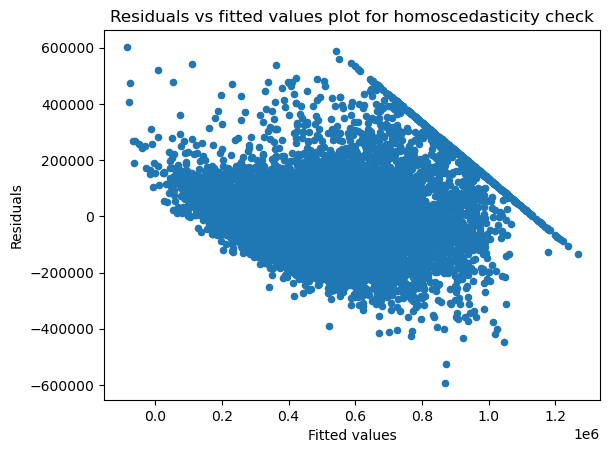

In [112]:
p = df.plot.scatter(x='fitted_value',y='residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

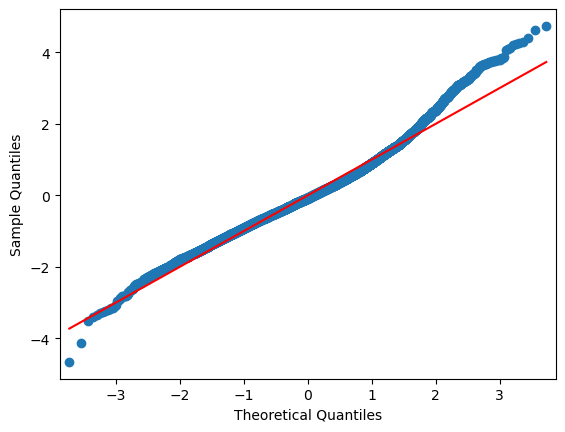

In [113]:


fig = sm.qqplot(df['residual'], fit=True, line='s')
plt.show()

<AxesSubplot:ylabel='Frequency'>

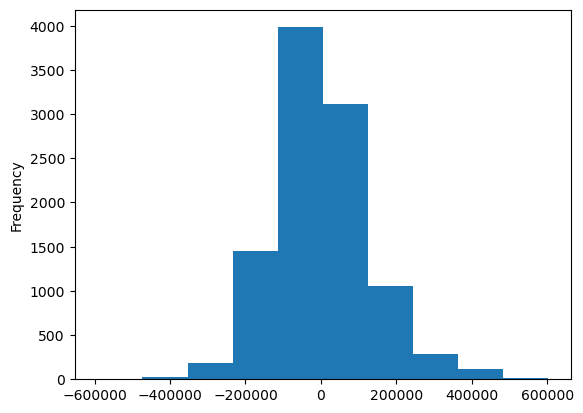

In [114]:
df['residual'].plot.hist()

In [115]:
statsmodels.stats.stattools.durbin_watson(df['residual'], axis=0)

2.002107608287975